In [1]:
#Author: Thang Tran
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy

In [2]:
x = np.loadtxt('P1.txt')
y = np.loadtxt('P2.txt')
Ts = np.loadtxt('Ts.txt')

In [3]:
def kMeans(x, y, centers_x, centers_y, k):
    n = len(x)
    dist = np.zeros([n, k])
    #Calculate distance of all points to the centers
    idx=[]
    for i in range(n):
        for j in range(k):
            dist[i, j] = np.sqrt((centers_x[j] - x[i])**2 + (centers_y[j] -y[i])**2)
    # Label the points with the closest center
        id = np.argmin(dist[i, :])
        idx.append(id)
    idx_array = np.array(idx)
    centers_x = []
    centers_y = []
    max_idx = np.max(idx)
    if max_idx == 0:
        for i in range(k):
            centers_x.append(np.mean(x))
            centers_y.append(np.mean(y))
    else:
        for i in range(max_idx + 1):
            position = np.where(idx_array == i)
            x_average = np.mean(x[position])
            centers_x.append(x_average)
            y_average = np.mean(y[position])
            centers_y.append(y_average)
    centers_x = np.array(centers_x)
    centers_y = np.array(centers_y)
    return centers_x, centers_y, idx


In [4]:
def kMeansIteration(x, y, random_center_x, random_center_y, k):
    centers_x, centers_y, idx = kMeans(x, y, random_center_x, random_center_y, k)
    iter = 0
    # Keep recalculating new centers until no new points are assigned
    # This means that error = 0 or idx_old = idx
    while True:
        idx_old = deepcopy(idx)
        centers_x, centers_y, idx = kMeans(x, y, centers_x, centers_y, k)
        iter += 1
        if idx_old == idx:
            break
    print('Numbers of iterations: ', iter, '.Numbers of centroids:', k)
    return centers_x, centers_y, idx

In [5]:
def plotkMeans(x, y, idx, k):
    plt.figure(figsize=(10,5))
    color = ['b','y','g','k','c']
    idx_array = np.array(idx)
    for i in range(k):
        plt.scatter(x[np.where(idx_array ==i)], y[np.where(idx_array ==i)], c=color[i])
    plt.scatter(centers_x, centers_y, marker='*', s=200, c='r')
    
    plt.xlabel('$P1$', fontsize=20)
    plt.ylabel('$P2$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    

In [6]:
# Choose number of centroids and location
def randomCentroid(x, y, k):
    random_center_x = np.random.uniform(np.min(x), np.max(x), size=k)
    random_center_y = np.random.uniform(np.min(y), np.max(y), size=k)
    return random_center_x, random_center_y

def plotRandomCentroid(x, y, random_center_x, random_center_y):
    plt.figure(figsize=(10,5))
    plt.scatter(x, y, c='k')
    plt.scatter(random_center_x, random_center_y, s=200, c='r', marker ='*')
    plt.xlabel('$P1$', fontsize=20)
    plt.ylabel('$P2$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Choose k numbers of centroids randomly', fontsize=20)
    
    

Numbers of iterations:  2 .Numbers of centroids: 2
Numbers of iterations:  10 .Numbers of centroids: 3


Text(0.5, 1.0, 'k = 3')

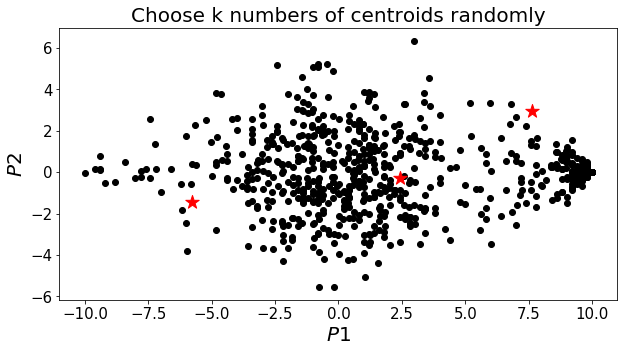

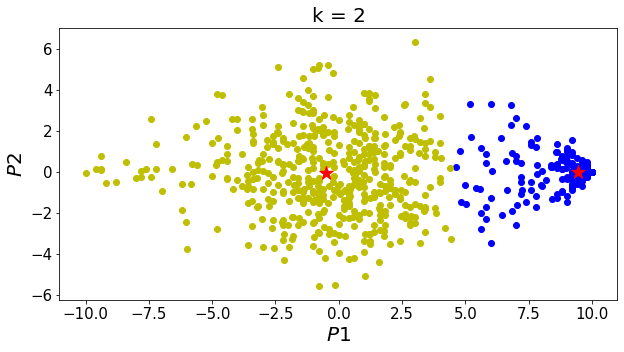

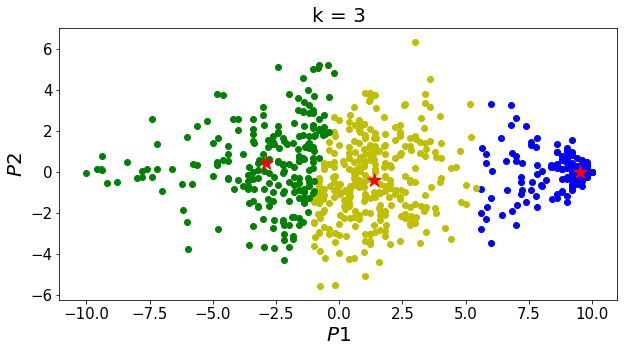

In [7]:
# KMeans for the entire temperature map

# Choose centroids randomly
random_center_x, random_center_y = randomCentroid(x, y, k=3)
plotRandomCentroid(x, y, random_center_x, random_center_y)
# k=2
centers_x, centers_y, idx = kMeansIteration(x, y, random_center_x, random_center_y, k=2)
plotkMeans(x, y, idx, k=2)
plt.title('k = 2', fontsize=20)

# k=3
centers_x, centers_y, idx = kMeansIteration(x, y, random_center_x, random_center_y, k=3)
plotkMeans(x, y, idx, k=3)
plt.title('k = 3', fontsize=20)



Numbers of iterations:  1 .Numbers of centroids: 2
Numbers of iterations:  1 .Numbers of centroids: 2
Numbers of iterations:  1 .Numbers of centroids: 2
Numbers of iterations:  4 .Numbers of centroids: 2
Numbers of iterations:  3 .Numbers of centroids: 2
Numbers of iterations:  8 .Numbers of centroids: 2
Numbers of iterations:  6 .Numbers of centroids: 2
Numbers of iterations:  5 .Numbers of centroids: 2
Numbers of iterations:  7 .Numbers of centroids: 2
Numbers of iterations:  6 .Numbers of centroids: 2


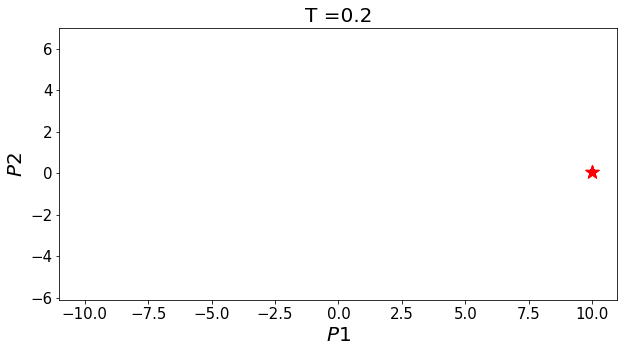

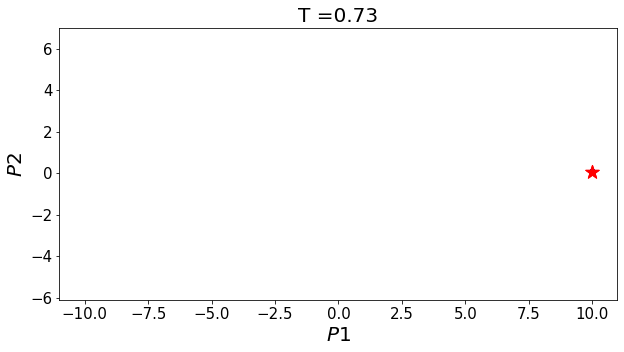

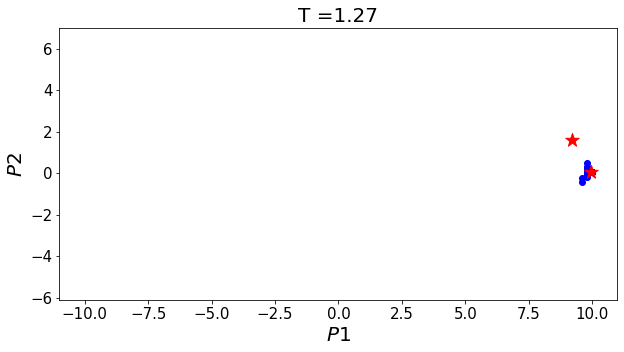

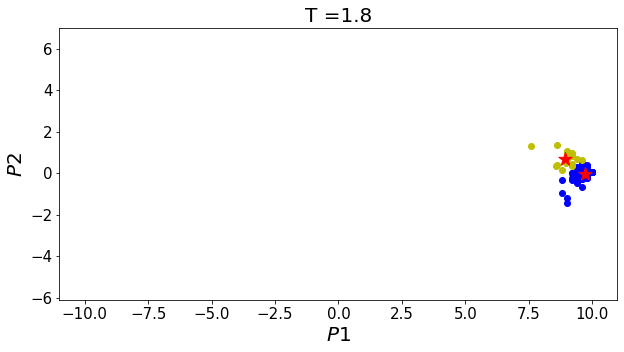

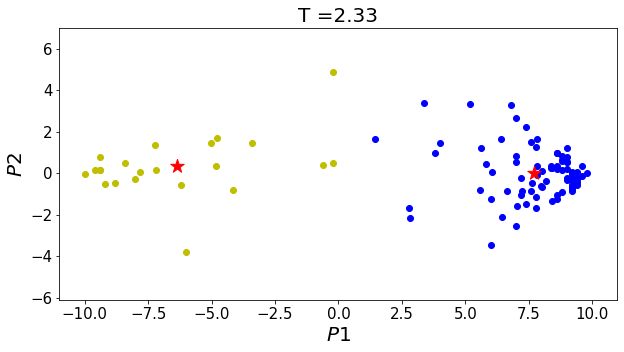

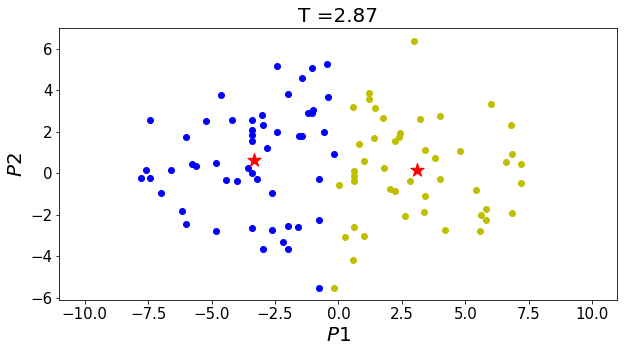

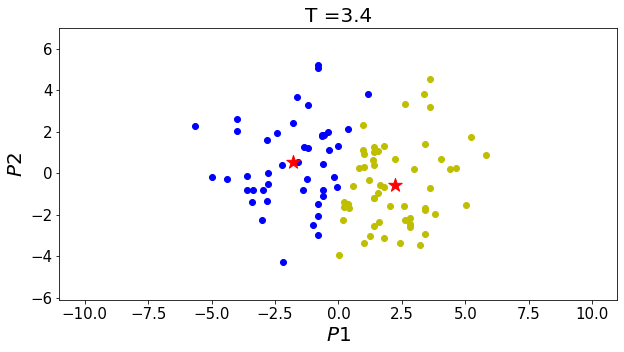

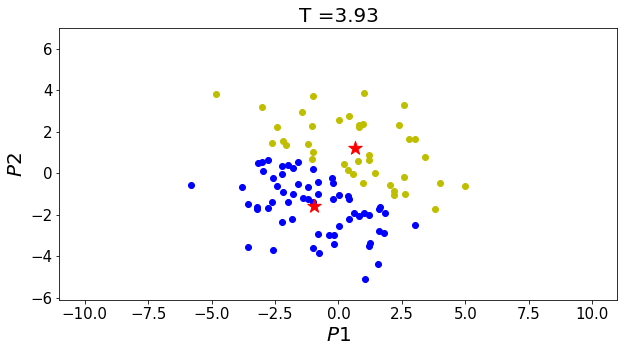

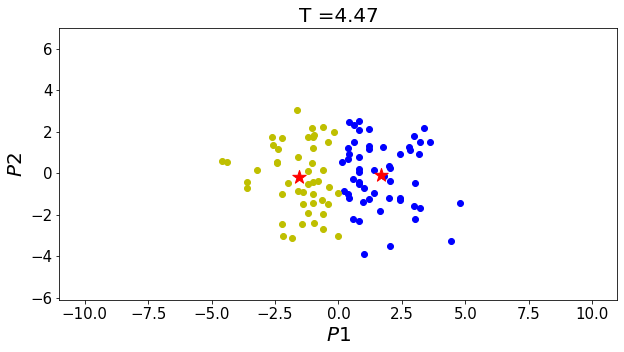

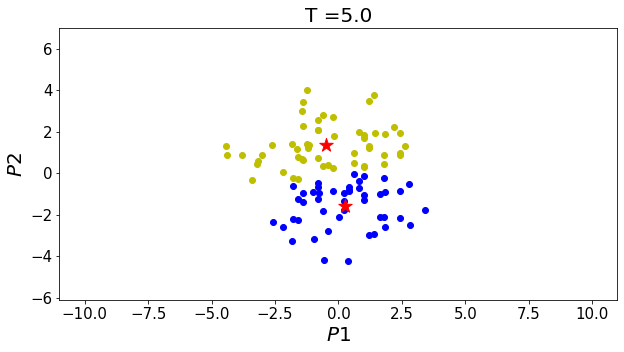

In [8]:
# KMeans for each temperature

a = np.arange(0, 1000, 100, dtype=int)
centroids_dist = []
T = np.linspace(0.2, 5, 10)

for i in range(len(T)):
    data_x = x[a[i]: a[i]+100]
    data_y = y[a[i]: a[i]+100]
    random_center_x, random_center_y = randomCentroid(data_x, data_y, k=2)
    centers_x, centers_y, idx = kMeansIteration(data_x, data_y, random_center_x, random_center_y, k=2)
    # print(i, centers_x, centers_y)
    plotkMeans(data_x, data_y, idx, k=2)
    plt.xlim(1.1*np.min(x), 1.1*np.max(x))
    plt.ylim(1.1*np.min(y), 1.1*np.max(y))
    plt.title('T ='+str(round(T[i],2)), fontsize=20)
    x_location = (centers_x[0] -centers_x[1])**2
    y_location = (centers_y[0] - centers_y[1])**2
    dist = np.sqrt(x_location + y_location)
    centroids_dist.append(dist)


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text yticklabel objects>)

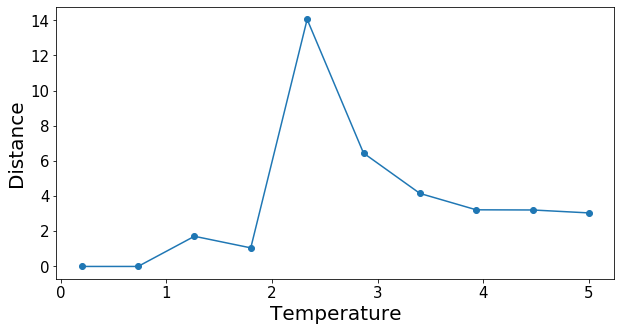

In [17]:
plt.figure(figsize=(10,5))
plt.plot(T, centroids_dist, marker='o')
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Distance', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


In [29]:
# There is clearly a jump in distance around the point T ~ 2.3, 
# which is the critical temperature.